NLP Pipelines

In [ ]:
27.53

In [6]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\himanshu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
print(tf.__version__)


2.18.0


In [ ]:
minst = tf.keras.datasets.mnist

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 31s 3us/step


In [15]:
# Normalize the dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [16]:
model = tf.keras.models.Sequential()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the model
model = Sequential()

# Input Layer - Flatten the 28x28 images into a 1D vector
model.add(Flatten(input_shape=(28, 28)))  

# Hidden Layers with ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output Layer - 10 neurons for 10 classes (digits 0-9)
model.add(Dense(10, activation='softmax'))  

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9671 - loss: 0.1089
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0731
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0512


In [25]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.0994
Test loss: 0.08525308221578598
Test accuracy: 0.9760000109672546


In [27]:
# Save the model in the new Keras 3 format
model.save("handwritten.keras")

# Load the model
model = tf.keras.models.load_model("handwritten.keras")


In [ ]:
image_number = 1
while os.path.isfile(f"  "):
    try:
        img = cv2.imread(f" ")
        img = np.invert(np.array([img]))
        predication = model.predict(img)
        print(predication)
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number +=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Prediction for img1.1.png: 3


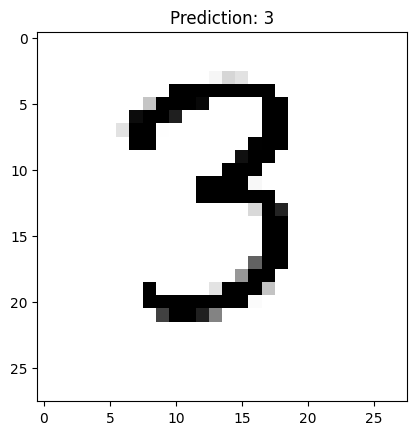

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction for img1.2.png: 7


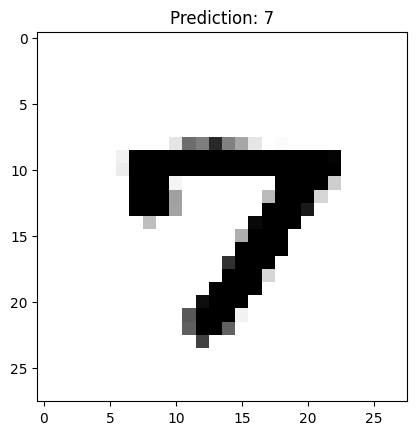

In [46]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the saved model (ensure it's in `.keras` or `.h5` format)
model = tf.keras.models.load_model("handwritten.keras")  # Or "handwritten.h5"

# Path to the folder containing images (Update this with your actual path)
image_folder = r"C:\Users\himanshu\OneDrive\Documents\NLP\img"

# Loop through all PNG images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):  # Process only PNG images
        try:
            # Construct full image path
            img_path = os.path.join(image_folder, filename)

            # Read the image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Resize to 28x28 if necessary (ensure shape compatibility)
            img = cv2.resize(img, (28, 28))

            # Invert colors (MNIST is black background, white digit)
            img = np.invert(img)

            # Normalize pixel values (as was done during training)
            img = img / 255.0  

            # Reshape to match model input shape (1, 28, 28, 1)
            img = img.reshape(1, 28, 28, 1)

            # Make a prediction
            prediction = model.predict(img)

            # Print the predicted digit
            print(f"Prediction for {filename}: {np.argmax(prediction)}")

            # Show the image
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.title(f"Prediction: {np.argmax(prediction)}")
            plt.show()

        except Exception as e:
            print(f"Error processing {filename}: {e}")
